In [1]:
!git clone https://github.com/facebookresearch/segment-anything.git
%cd segment-anything
!pip install -e .
!wget https://dl.fbaipublicfiles.com/segment_anything/sam_vit_b_01ec64.pth

from google.colab import files
files.upload()

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d debeshjha1/kvasircapsuleseg
!unzip kvasircapsuleseg.zip -d kvasircapsuleseg

import os
import torch
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from segment_anything import sam_model_registry, SamPredictor

sam_checkpoint = "sam_vit_b_01ec64.pth"
model_type = "vit_b"
device = "cuda" if torch.cuda.is_available() else "cpu"

sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)
sam.to(device)
predictor = SamPredictor(sam)

Cloning into 'segment-anything'...
remote: Enumerating objects: 304, done.
remote: Counting objects: 100% (5/5), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 304 (delta 2), reused 1 (delta 1), pack-reused 299 (from 2)
Receiving objects: 100% (304/304), 18.31 MiB | 17.22 MiB/s, done.
Resolving deltas: 100% (159/159), done.
/content/segment-anything
Obtaining file:///content/segment-anything
  Preparing metadata (setup.py) ... done
  Running setup.py develop for segment_anything
--2025-10-08 18:04:34--  https://dl.fbaipublicfiles.com/segment_anything/sam_vit_b_01ec64.pth
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 13.35.37.111, 13.35.37.123, 13.35.37.90, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|13.35.37.111|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 375042383 (358M) [binary/octet-stream]
Saving to: ‘sam_vit_b_01ec64.pth’

sam_vit_b_01ec64.pt 100%[===================>] 357.67M   273MB/s    in 1.

Saving kaggle.json to kaggle.json
Dataset URL: https://www.kaggle.com/datasets/debeshjha1/kvasircapsuleseg
License(s): copyright-authors
  0% 0.00/3.93M [00:00<?, ?B/s]
100% 3.93M/3.93M [00:00<00:00, 985MB/s]
Archive:  kvasircapsuleseg.zip
  inflating: kvasircapsuleseg/Kvasir-Capsule/2104.11138.pdf  
  inflating: kvasircapsuleseg/Kvasir-Capsule/annotated_images/131368cc17e44240_28955.jpg  
  inflating: kvasircapsuleseg/Kvasir-Capsule/annotated_images/131368cc17e44240_28956.jpg  
  inflating: kvasircapsuleseg/Kvasir-Capsule/annotated_images/131368cc17e44240_28957.jpg  
  inflating: kvasircapsuleseg/Kvasir-Capsule/annotated_images/131368cc17e44240_28958.jpg  
  inflating: kvasircapsuleseg/Kvasir-Capsule/annotated_images/131368cc17e44240_28959.jpg  
  inflating: kvasircapsuleseg/Kvasir-Capsule/annotated_images/131368cc17e44240_28960.jpg  
  inflating: kvasircapsuleseg/Kvasir-Capsule/annotated_images/131368cc17e44240_28961.jpg  
  inflating: kvasircapsuleseg/Kvasir-Capsule/annotated_images

In [ ]:
test_images_dir = "kvasircapsuleseg/Kvasir-Capsule/images"
output_masks_dir = "Kvasir-Capsule/predictor_masks"
os.makedirs(output_masks_dir, exist_ok=True)

In [ ]:
for fname in sorted(os.listdir(test_images_dir)):
    if not fname.endswith((".jpg", ".png")):
        continue

    image_path = os.path.join(test_images_dir, fname)
    image = np.array(Image.open(image_path).convert("RGB"))

    predictor.set_image(image)

    h, w = image.shape[:2]
    input_point = np.array([[w // 2, h // 2]])
    input_label = np.array([1])

    pred_mask, pred_scores, _ = predictor.predict(
        point_coords=input_point,
        point_labels=input_label,
        multimask_output=True
    )

    combined_mask = np.zeros_like(pred_mask[0], dtype=np.uint8)
    for pm in pred_mask:
        combined_mask = np.logical_or(combined_mask, pm)

    final_mask = (combined_mask.astype(np.uint8)) * 255

    Image.fromarray(final_mask).save(os.path.join(output_masks_dir, fname))

    print(f"Processed {fname} → saved predictor mask")

Processed 131368cc17e44240_28955.jpg → saved predictor mask
Processed 131368cc17e44240_28956.jpg → saved predictor mask
Processed 131368cc17e44240_28957.jpg → saved predictor mask
Processed 131368cc17e44240_28958.jpg → saved predictor mask
Processed 131368cc17e44240_28959.jpg → saved predictor mask
Processed 131368cc17e44240_28960.jpg → saved predictor mask
Processed 131368cc17e44240_28961.jpg → saved predictor mask
Processed 131368cc17e44240_28962.jpg → saved predictor mask
Processed 131368cc17e44240_28963.jpg → saved predictor mask
Processed 131368cc17e44240_28964.jpg → saved predictor mask
Processed 131368cc17e44240_28965.jpg → saved predictor mask
Processed 131368cc17e44240_28966.jpg → saved predictor mask
Processed 131368cc17e44240_28967.jpg → saved predictor mask
Processed 131368cc17e44240_28968.jpg → saved predictor mask
Processed 131368cc17e44240_28969.jpg → saved predictor mask
Processed 131368cc17e44240_28970.jpg → saved predictor mask
Processed 131368cc17e44240_28971.jpg → s

In [ ]:
def show_image_with_mask(image, mask):
    plt.figure(figsize=(8,4))
    plt.subplot(1,2,1)
    plt.imshow(image)
    plt.axis("off")
    plt.subplot(1,2,2)
    plt.imshow(mask, cmap="gray")
    plt.axis("off")
    plt.show()

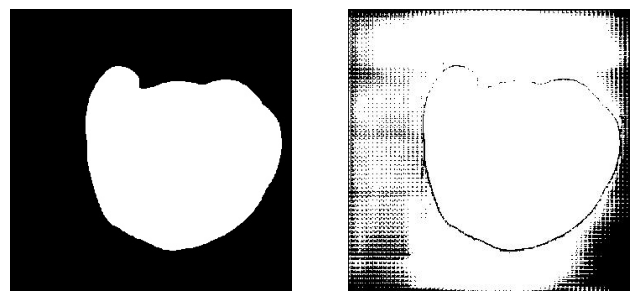

In [ ]:
sample_img_path = os.path.join(test_images_dir, "131368cc17e44240_29006.jpg")
sample_img = np.array(Image.open(sample_img_path).convert("RGB"))
sample_mask = np.array(Image.open(os.path.join(output_masks_dir, "131368cc17e44240_29006.jpg")))
show_image_with_mask(sample_img, sample_mask)

In [ ]:
from sklearn.metrics import jaccard_score

gt_masks_dir = "kvasircapsuleseg/Kvasir-Capsule/masks"

def dice_coefficient(gt, pred):
    gt = gt.astype(bool)
    pred = pred.astype(bool)
    intersection = np.logical_and(gt, pred).sum()
    return (2. * intersection) / (gt.sum() + pred.sum() + 1e-8)

def iou_score(gt, pred):
    gt = gt.astype(bool).flatten()
    pred = pred.astype(bool).flatten()
    return jaccard_score(gt, pred)

dice_scores = []
iou_scores = []

for fname in sorted(os.listdir(test_images_dir)):
    if not fname.endswith((".jpg", ".png")):
        continue

    gt_path = os.path.join(gt_masks_dir, fname)
    pred_path = os.path.join(output_masks_dir, fname)

    if not os.path.exists(gt_path) or not os.path.exists(pred_path):
        continue

    gt_mask = np.array(Image.open(gt_path).convert("L"))
    pred_mask = np.array(Image.open(pred_path).convert("L"))

    gt_mask = (gt_mask > 127).astype(np.uint8)
    pred_mask = (pred_mask > 127).astype(np.uint8)

    dice = dice_coefficient(gt_mask, pred_mask)
    iou = iou_score(gt_mask, pred_mask)

    dice_scores.append(dice)
    iou_scores.append(iou)

print("Evaluation Results on Test Set")
print(f"Average Dice: {np.mean(dice_scores):.4f}")
print(f"Average IoU : {np.mean(iou_scores):.4f}")

Evaluation Results on Test Set
Average Dice: 0.9614
Average IoU : 0.9332
